## Revision

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random 

import seaborn as sns
sns.set(color_codes=True)

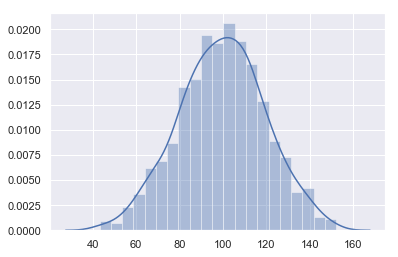

In [2]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

In [7]:
# get two samples from the population
k = 100
sample_one = np.random.choice(pop,100,replace=True)
sample_two = np.random.choice(pop,100,replace=True)

print(stats.describe(sample_one))
stats.describe(sample_two)

DescribeResult(nobs=100, minmax=(43.27236460800663, 139.9426079050454), mean=100.87317149131376, variance=444.34745057975084, skewness=-0.36126235741101737, kurtosis=-0.479249240916368)


DescribeResult(nobs=100, minmax=(43.135014817312, 131.27214654511798), mean=96.89965542015528, variance=326.2797468177451, skewness=-0.32734019275737514, kurtosis=0.053964395765414785)

In [8]:
# sample means
stats.ttest_ind(sample_one, sample_two)

Ttest_indResult(statistic=1.4313729567652778, pvalue=0.15389986665394434)

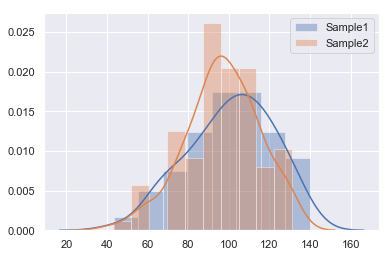

In [10]:
plt.figure("Test Samples")
sns.distplot(sample_one, label='Sample1') 
sns.distplot(sample_two, label='Sample2')
plt.legend()
plt.show()

In [15]:
# simulating type 1 and type two errors
def type_1_error(population, num_test, alpha_set):
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_1_error', 'p_value', and 'alpha'
    """
    
    columns = ['type_1_error', 'p_value', 'alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1, num_tests+1):
        
        for alpha in alpha_set:
            
            sample_one = np.random.choice(population,100,replace=True)
            sample_two = np.random.choice(population,100, replace=True)
            
            result = stats.ttest_ind(sample_one, sample_two)
            
            if result[1] < alpha:
                sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                sig_tests.loc[counter] = [0, result[1], alpha]
                
            counter += 1
    
    return sig_tests

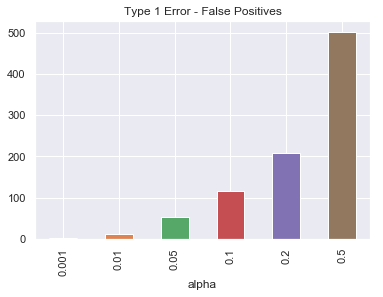

In [16]:
pop = np.random.normal(100,20,1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()
group_error.plot.bar(title = 'Type 1 Error - False Positives')

In [17]:
def type_2_error(population, population_2, num_tests, alpha_set):
    
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    population_2: ndarray
        A different random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    
    columns = ['type_2_error','p_val','alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1,num_tests+1):
        
        for alpha in alpha_set:
            
            # take two samples from the same population
            samp1 = np.random.choice(population,100,replace=True)
            samp2 = np.random.choice(population_2,100,replace=True)
            
            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            
            # evaluate whether null hypothesis is rejected or not
            if result[1] > alpha:
                 sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                 sig_tests.loc[counter] = [0, result[1], alpha]

            counter += 1
            
    return sig_tests

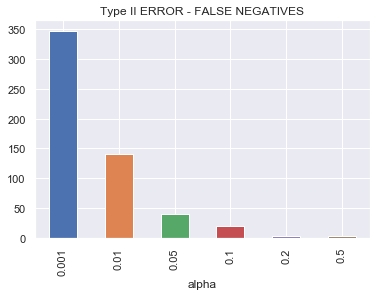

In [18]:
pop = np.random.normal(100, 20, 1000)
pop2 = np.random.normal(110, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_2 = type_2_error(pop,pop2,num_tests,alpha_set)

group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()
group_error2.plot.bar(title = "Type II ERROR - FALSE NEGATIVES")

Why is an α level of 0.05 chosen as a cut-off for statistical significance?
The $\alpha$ level of 0.05 is considered s good balance to avoid excessive type I or type II errors.

If you decide to use a large value for alpha :

Increases the chance of rejecting the null hypothesis
The risk of a Type II error (false negative) is REDUCED
Risk of a Type I error (false positive) is INCREASED
Similarly, if you decide to use a very small value of alpha, it'll change the outcome as:

Increases the chance of accepting the null hypothesis
The risk of a Type I error (false positive) is REDUCED
Risk of a Type II error (false negative) is INCREASED